In [1]:
from pathlib import Path
import os

# Creating 'result' folder
current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')
results_dir.mkdir(parents=True, exist_ok=True)

# Assignment 6.1

In [2]:
# importing libraries
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers 
from keras import models
import matplotlib.pyplot as plt


# Importing MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# Reshaping dimensions to allow model to recognize the inputs
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Converting to categorical variable
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Splitting training set into validation and training dataset
train_images_val = train_images[:10000]
partial_train_images = train_images[10000:]

train_labels_val = train_labels[:10000]
partial_train_labels = train_labels[10000:]

# Constructing CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Applying flattening function
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_train_images, partial_train_labels, epochs=5, batch_size=64, validation_data=(train_images_val,train_labels_val))

Epoch 1/5
782/782 [==============================] - 54s 67ms/step - loss: 0.2001 - accuracy: 0.9378 - val_loss: 0.1383 - val_accuracy: 0.9557
Epoch 2/5
782/782 [==============================] - 46s 59ms/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0521 - val_accuracy: 0.9845
Epoch 3/5
782/782 [==============================] - 41s 52ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0478 - val_accuracy: 0.9866
Epoch 4/5
782/782 [==============================] - 33s 43ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.0442 - val_accuracy: 0.9885
Epoch 5/5
782/782 [==============================] - 35s 45ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0402 - val_accuracy: 0.9893


In [5]:
# Calculating accuracy rate
test_loss, test_acc = model.evaluate(test_images,test_labels)
test_acc

313/313 [==============================] - 2s 7ms/step - loss: 0.0339 - accuracy: 0.9906


0.9905999898910522

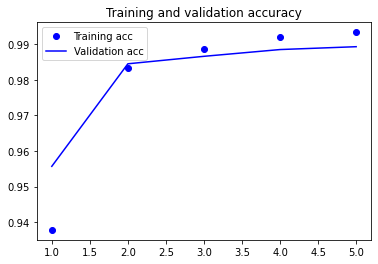

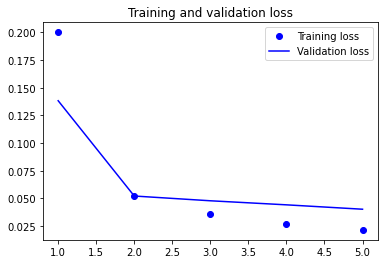

In [5]:
history_dict = history.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Creating a validation plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('results/6.1/6.1_accuracy_plot.png')

# Creating a accuracy plot
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('results/6.1/6.1_validation_plot.png')
plt.show()

In [8]:
model.save('results/6.1/6.1_CNN_model.h5')

# making predictions 
import numpy as np
pred = model.predict(test_images) 
prediction = np.argmax(pred, axis=1) 

# Saving metrics and prediction
np.savetxt('results/6.1/6.1_prediction.txt', prediction, fmt='%d') 
np.savetxt('results/6.1/6.1_metrics.txt', np.column_stack((loss, acc, val_loss, val_acc)), fmt='%f')

313/313 [==============================] - 2s 7ms/step


# Assignment 6.2a

In [2]:
# Importing libraries
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers, optimizers, losses 
from keras import models
import matplotlib.pyplot as plt

# Importing dataset
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


In [3]:
# Reshaping dimensions to allow model to recognize the inputs
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# Converting to categorical variables
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
train_labels.shape

(50000, 10)

In [4]:
# Applying layers to construct CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Applying Flattening layer
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_initializer= 'he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=["acc"]
)                   

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# Processing the images to accurately train the model
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(train_data)
test_datagen.fit(test_data)

train_generator = train_datagen.flow(train_data, train_labels, batch_size=32)
valid_generator = test_datagen.flow(test_data, test_labels, batch_size=32)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)


In [6]:
# Fitting the model to the dataset
history = model.fit(
      train_generator, 
      epochs=64,
      validation_data=valid_generator,
      validation_steps=len(valid_generator),
      steps_per_epoch=50)

Epoch 1/64


2023-04-22 12:48:33.649263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 3.1948 - acc: 0.2237

2023-04-22 12:48:49.662743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 32s 563ms/step - loss: 3.1948 - acc: 0.2237 - val_loss: 2.4281 - val_acc: 0.1000
Epoch 2/64
50/50 [==============================] - 29s 581ms/step - loss: 1.7935 - acc: 0.3556 - val_loss: 2.6412 - val_acc: 0.1000
Epoch 3/64
50/50 [==============================] - 29s 585ms/step - loss: 1.6762 - acc: 0.3869 - val_loss: 2.7983 - val_acc: 0.1000
Epoch 4/64
50/50 [==============================] - 27s 553ms/step - loss: 1.6272 - acc: 0.3787 - val_loss: 2.8732 - val_acc: 0.1000
Epoch 5/64
50/50 [==============================] - 29s 582ms/step - loss: 1.4944 - acc: 0.4688 - val_loss: 3.1179 - val_acc: 0.1000
Epoch 6/64
50/50 [==============================] - 27s 539ms/step - loss: 1.4923 - acc: 0.4475 - val_loss: 3.8167 - val_acc: 0.1000
Epoch 7/64
50/50 [==============================] - 25s 511ms/step - loss: 1.4531 - acc: 0.4712 - val_loss: 3.6677 - val_acc: 0.1001
Epoch 8/64
50/50 [==============================] - 24s 490ms/step - loss: 1.376

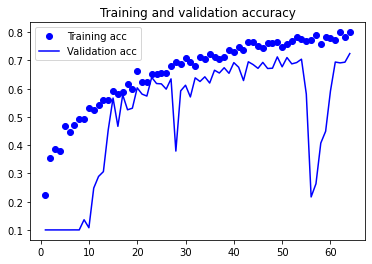

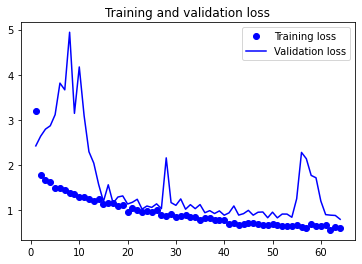

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Creating accuracy plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
# plt.savefig('results/6.2/6.2a_accuracy_plot.png')
plt.legend()
plt.figure()

# Creating Loss plot
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.savefig('results/6.2/6.2a_validation_plot.png')
plt.show()

In [8]:
model.save('Cifar10_CNN_model.h5')

# making predictions 
import numpy as np
pred = model.predict(test_data) 
prediction = np.argmax(pred, axis=1) 

# Saving prediction and metrics to a text file
np.savetxt('results/6.2/6.2_prediction.txt', prediction, fmt='%d') 
np.savetxt('results/6.2/6.2_metrics.txt', np.column_stack((loss, acc, val_loss, val_acc)), fmt='%f')

313/313 [==============================] - 16s 50ms/step


# Assignment 6.2b

In [2]:
# Importing libraries
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers, optimizers
from keras import models
import matplotlib.pyplot as plt

# Importing dataset
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

# Reshaping dimensions to allow model to recognize the inputs
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# Converting dataset into categorical variables
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [3]:
# Adding layers to create a CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Applying flatten funtion and dropout function
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Adding dropout 
model.add(layers.Dense(512, activation='relu', kernel_initializer= 'he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=["acc"]
) 

In [4]:
# Adding data augmentation
from keras.preprocessing.image import ImageDataGenerator

# Processing the images by applying data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(train_data)
test_datagen.fit(test_data)

train_generator = train_datagen.flow(train_data, train_labels, batch_size=32)
valid_generator = test_datagen.flow(test_data, test_labels, batch_size=32)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

# Fitting model to the dataset
history = model.fit(
      train_generator, 
      epochs=64,
      validation_data=valid_generator,
      validation_steps=len(valid_generator),
      steps_per_epoch=50)

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)
Epoch 1/64


2023-04-22 13:24:33.276113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 3.5653 - acc: 0.1813

2023-04-22 13:24:46.792826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 27s 490ms/step - loss: 3.5653 - acc: 0.1813 - val_loss: 2.4884 - val_acc: 0.1000
Epoch 2/64
50/50 [==============================] - 29s 582ms/step - loss: 2.0922 - acc: 0.2494 - val_loss: 2.6275 - val_acc: 0.1000
Epoch 3/64
50/50 [==============================] - 25s 495ms/step - loss: 2.0019 - acc: 0.2656 - val_loss: 3.1911 - val_acc: 0.1000
Epoch 4/64
50/50 [==============================] - 27s 540ms/step - loss: 1.9523 - acc: 0.2944 - val_loss: 3.0403 - val_acc: 0.1001
Epoch 5/64
50/50 [==============================] - 29s 592ms/step - loss: 1.9463 - acc: 0.2875 - val_loss: 2.6086 - val_acc: 0.1000
Epoch 6/64
50/50 [==============================] - 27s 539ms/step - loss: 1.8630 - acc: 0.3275 - val_loss: 3.4103 - val_acc: 0.1000
Epoch 7/64
50/50 [==============================] - 26s 531ms/step - loss: 1.8521 - acc: 0.3231 - val_loss: 3.6392 - val_acc: 0.1000
Epoch 8/64
50/50 [==============================] - 27s 550ms/step - loss: 1.842

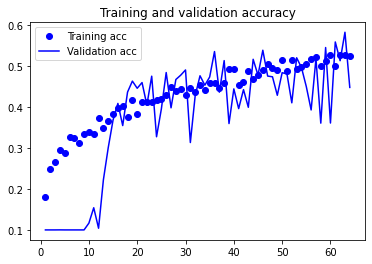

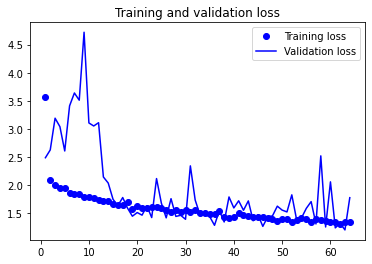

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting accuracy plot
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
# plt.savefig('results/6.2/6.2b_accuracy_plot.png')

# Plotting loss plot
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.savefig('results/6.2/6.2b_validation_plot.png')
plt.show()

In [6]:
# model.save('results/6.2/6.2b_Cifar10_CNN_Data_Aug_model.h5')

# making predictions 
import numpy as np
pred = model.predict(test_data) 
prediction = np.argmax(pred, axis=1) 

# Saving prediction and metrics to a text file
np.savetxt('results/6.2/6.2b_prediction.txt', prediction, fmt='%d') 
np.savetxt('results/6.2/6.2b_metrics.txt', np.column_stack((loss, acc, val_loss, val_acc)), fmt='%f')

313/313 [==============================] - 14s 45ms/step


# Assignment 6.3

In [1]:
# importing libraries
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from pathlib import Path
import os

# finding folder path
current_dir = Path(os.getcwd()).absolute()
images_dir = current_dir.joinpath('images')

# List containing path to images
image_paths = [os.path.join(images_dir, file) for file in os.listdir(images_dir)]

# List contain image names
image_names = []
for file in os.listdir(images_dir):
    name_only, extension = os.path.splitext(file)
    image_names.append(name_only)

2023-04-21 23:10:07.345774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Applying ResNet-50 pretrained model
model = ResNet50(weights='imagenet')

prediction_list = []
for i, img_path in enumerate(image_paths):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Making predictions
    prediction = model.predict(x)
    predicted_class = decode_predictions(prediction, top=3)[0]
    prediction_list.append(f"Actual Image {image_names[i]}.. \nPrediction:{predicted_class}\n")

1/1 [==============================] - 0s 223ms/step


In [4]:
results_dir = current_dir.joinpath('results')

# Saving predictions to the result folder
with open(str(results_dir) + '/Predictions/ResNet-50 Prediction.txt','w') as f:
    for pred in prediction_list:
        f.write(f'{pred}\n')